https://youtu.be/f1fXCRtSUWU

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Flatten # core layers
import tensorflow as tf
from keras.layers.normalization import BatchNormalization

In [231]:
from keras.datasets import mnist

In [232]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

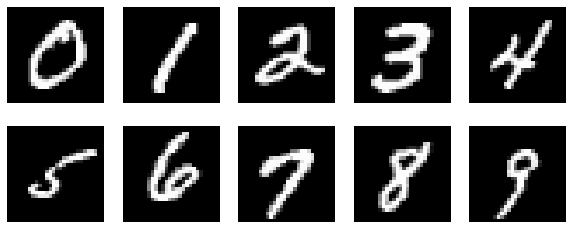

In [233]:
i=0; j=0; out = []
while i<10:
    if i == y_train[j]:
        out.append(X_train[j])
        i+=1
    j+=1
plt.figure(figsize=(10, 4))
for i, x in enumerate(out):
    plt.subplot(2, 5, i+1); plt.axis('off')
    plt.imshow(x, cmap='gray')
plt.show()


In [234]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [235]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [236]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [237]:
# Data Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [289]:
# Define Model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))    
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (1,1), activation="relu"))    
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(512,activation="relu"))    
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_138 (Bat (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 4, 4, 128)       

In [290]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adamax', loss=loss_fn, metrics=['accuracy'])


In [291]:
myCallback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3,
    min_lr=0,
    verbose=1
)

In [292]:
# Training model
history=model.fit(X_train,
        y_train,
        epochs=50,
        verbose=1,
        validation_split=0.2,
        callbacks= [myCallback]
    )

Epoch 1/50
1500/1500 [==============================] - 8s 6ms/step - loss: 1.5034 - accuracy: 0.9629 - val_loss: 1.4778 - val_accuracy: 0.9844
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4786 - accuracy: 0.9833 - val_loss: 1.4740 - val_accuracy: 0.9882
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4744 - accuracy: 0.9874 - val_loss: 1.4730 - val_accuracy: 0.9887
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4721 - accuracy: 0.9897 - val_loss: 1.4727 - val_accuracy: 0.9892
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4709 - accuracy: 0.9905 - val_loss: 1.4715 - val_accuracy: 0.9900
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4709 - val_accuracy: 0.9902
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4717 - val_accuracy:

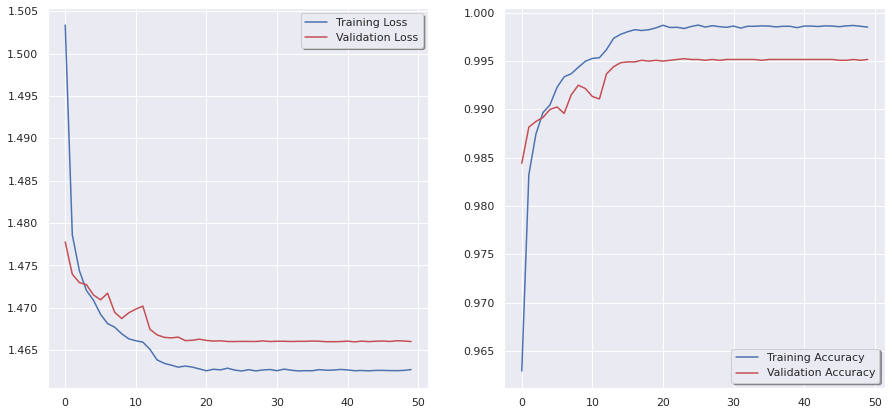

In [293]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [294]:
out = model.evaluate(X_test, y_test)
out

313/313 [==============================] - 1s 3ms/step - loss: 1.4659 - accuracy: 0.9955


[1.4659268856048584, 0.9955000281333923]

In [295]:
pred = model.predict(X_test)
pred[0]

array([8.4748791e-14, 1.5599764e-13, 1.1677853e-12, 2.2916517e-12,
       7.0849541e-15, 1.8117687e-14, 1.3596251e-15, 1.0000000e+00,
       7.5254566e-15, 3.3675044e-12], dtype=float32)

In [296]:
y_pred=[]
for x in pred:
    y_pred.append(np.argmax(x))
y_pred[0]

7


Accuracy :  0.9955 

CONFUSION MATRIX:



array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

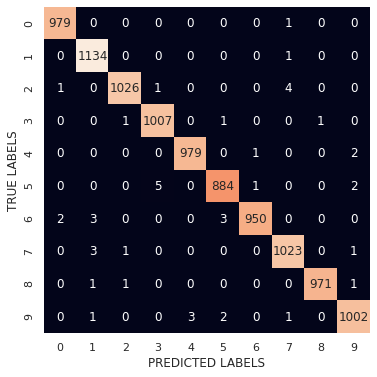

In [297]:
from sklearn.metrics import confusion_matrix; sns.set_theme()

cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score 
print ("\nAccuracy : ", accuracy_score(y_test, y_pred), "\n")

print("CONFUSION MATRIX:\n")
labels = [0,1,2,3,4,5,6,7,8,9]
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.ylabel('TRUE LABELS')
plt.xlabel('PREDICTED LABELS');
np.unique(y_test, return_counts=True)[1]